# 1: Install Required Packages

In this step, we install the necessary Python packages to run the quantum circuit. The required packages are:

- `qiskit==1.3.1`: The core Qiskit package for quantum computing.
- `pylatexenc`: A package used for handling LaTeX in Python.
- `qiskit-aer`: A Qiskit component for running quantum circuits on simulators.

In [1]:
!pip install qiskit==1.3.1
!pip install pylatexenc
!pip install qiskit-aer

# 2: Import Necessary Libraries

In this step, we import all the required libraries for building and running the quantum circuit, as well as for performing additional tasks like visualizing results. These include:

- `ClassicalRegister` and `QuantumRegister` from `qiskit.circuit`: For creating classical and quantum registers.
- `Parameter` from `qiskit.circuit`: For defining parameters in quantum gates and circuits.
- `QuantumCircuit` from `qiskit.circuit`: The core class for constructing quantum circuits.
- `Estimator` and `Sampler` from `qiskit.primitives`: Used for quantum estimation and sampling tasks.
- `SparsePauliOp` from `qiskit.quantum_info`: For working with Pauli operators in quantum circuits.
- `plot_histogram` from `qiskit.visualization`: For visualizing the results as histograms.
- `numpy` and `matplotlib`: For handling numerical operations and plotting the data.


In [2]:
from qiskit.circuit import ClassicalRegister, QuantumRegister
from qiskit.circuit import Parameter
from qiskit.circuit import QuantumCircuit
from qiskit.primitives import Estimator, Sampler
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_histogram
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

# 3: Prepare a Random General Qubit State

In this step, we prepare a random **general qubit state** of the form:

$$
|\psi\rangle = \alpha |0\rangle + \beta |1\rangle
$$

where $\alpha$ and $\beta$ are complex numbers satisfying the **normalization condition**:

$$
|\alpha|^2 + |\beta|^2 = 1
$$

---

### 🔹 What we do:
- Generate random complex numbers for $\alpha$ and $\beta$.
- Normalize them so that the state vector remains valid.
- Use the `initialize` method to prepare the qubit in this random state.


---


0.8716311856220346 0.12836881437796535


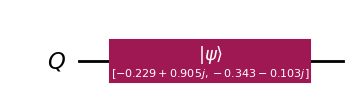

In [3]:
qr = QuantumRegister(1, 'Q')
qc = QuantumCircuit(qr)

# Generate random complex numbers
alpha = np.random.randn() + 1j * np.random.randn()
beta = np.random.randn() + 1j * np.random.randn()

# Normalize
norm = np.sqrt(abs(alpha)**2 + abs(beta)**2)
alpha /= norm
beta /= norm

# Prepare the random qubit
qc.initialize([alpha, beta], 0)
print(abs(alpha)**2, abs(beta)**2)
qc.draw('mpl')

# 4: Extend the Circuit for Teleportation Setup

In this step, we **extend** our existing circuit to prepare for the **teleportation protocol**.

We do the following:

---

### 🔹 Circuit Extension:
- Create a new **quantum register** `ghz` with 3 qubits (for generating a GHZ state later).
- Add **classical registers**:
  - `Alice` with 2 bits (to store Alice's measurement outcomes),
  - `Bob` with 1 bit (for Bob's correction operations),
  - `Charlie` with 1 bit (for Charlie's operations).

---

The final structure of the circuit now consists of:
- The original **single qubit** (to be teleported),
- **Three entangled qubits** (GHZ register),
- **Classical registers** for measurement and corrections.

---


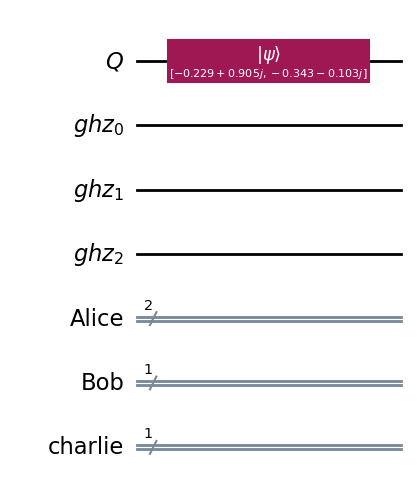

In [4]:
tele_qc = qc.copy()
ghz = QuantumRegister(3, 'ghz')
alice = ClassicalRegister(2, 'Alice')
bob = ClassicalRegister(1, 'Bob')
charlie = ClassicalRegister(1, 'charlie')
tele_qc.add_register(ghz, alice, bob, charlie)
tele_qc.draw('mpl')

# 5: Create a GHZ (Greenberger–Horne–Zeilinger) State

In this step, we create an **entangled GHZ state** among the three qubits added earlier.

---

## 🔹 Steps to Create GHZ State:

- Add a **barrier** to separate the preparation of the random qubit from the GHZ state creation.

- Apply a **Hadamard gate** \( H \) on qubit 1 to create superposition:

$$
H \left| 0 \right\rangle = \frac{1}{\sqrt{2}} \left( \left| 0 \right\rangle + \left| 1 \right\rangle \right)
$$

- Apply a **CNOT gate** between:
  - Control: qubit 1, Target: qubit 2
  - Control: qubit 1, Target: qubit 3

  This entangles qubit 1 with qubits 2 and 3, forming a GHZ state:

$$
\left| \text{GHZ} \right\rangle = \frac{1}{\sqrt{2}} \left( \left| 000 \right\rangle + \left| 111 \right\rangle \right)
$$

- Add another **barrier** after GHZ creation for clarity.

---


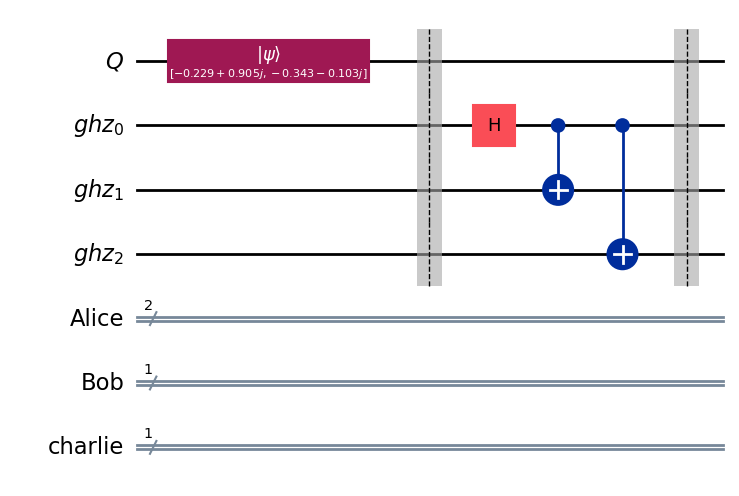

In [5]:
tele_qc.barrier()
tele_qc.h(1)
tele_qc.cx(1, 2)
tele_qc.cx(1, 3)
tele_qc.barrier()
tele_qc.draw('mpl')

# 6: Alice Entangles Her Qubit with the GHZ Qubit

In this step, **Alice entangles** her random qubit \( A \) (from `qr[0]`) with the first qubit of the GHZ state \(`ghz[0]`).

---

## 🔹 Steps:

- Apply a **CNOT gate** with:
  - **Control**: Alice’s random qubit \( A \) (qubit 0)
  - **Target**: First qubit of GHZ (qubit 1)

  This creates entanglement between Alice's qubit and the GHZ state.

$$
\text{CNOT}(A, \text{GHZ}_1)
$$

- Apply a **Hadamard gate** on Alice’s random qubit:

$$
H(A)
$$

This brings Alice's qubit into superposition and spreads entanglement across the system.

- Add a **barrier** after these operations for clarity.

---


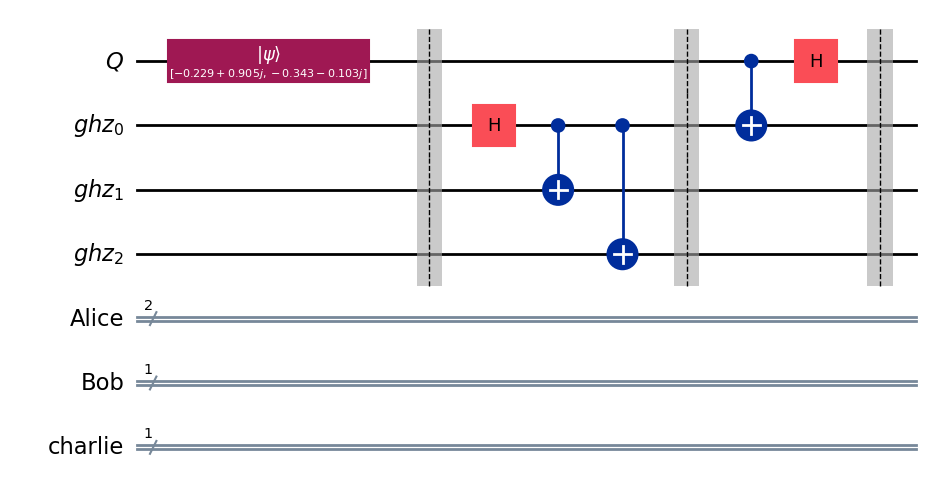

In [6]:
tele_qc.cx(qr[0], ghz[0])
tele_qc.h(qr[0])
tele_qc.barrier()
tele_qc.draw('mpl')

# 7. Alice Measures Qubits A and GHZ[0]

In this step, Alice performs a measurement on the qubits `qr[0]` and `ghz[0]`. The measurement results are stored in the `alice` classical register.


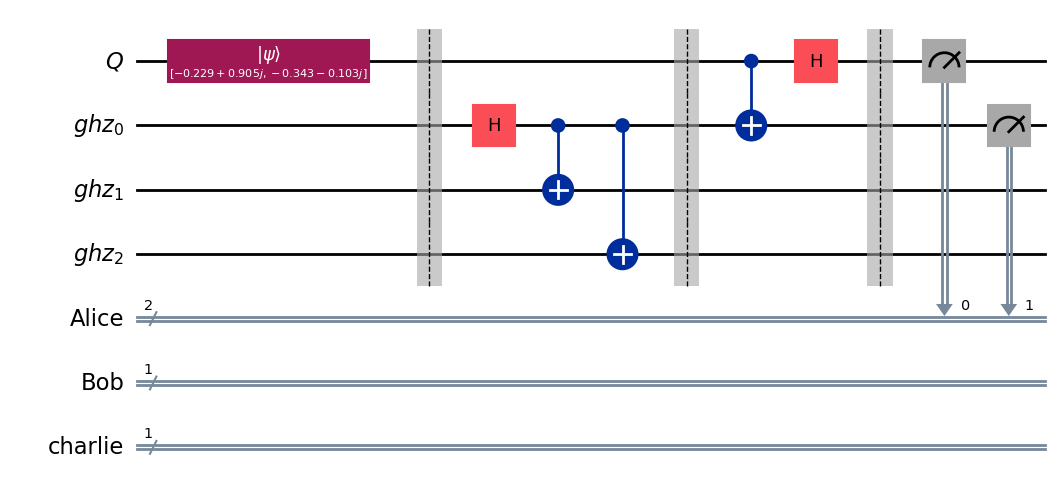

In [7]:
tele_qc.measure([qr[0], ghz[0]], alice)
tele_qc.draw('mpl')

# 8: Bob Measures GHZ[1] in the X-basis

In this step, Bob applies a Hadamard gate on the qubit `ghz[1]` to change its basis to the X-basis, before performing a measurement. The Hadamard gate transforms the qubit state as follows:
$$
H|0\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)
$$

$$
H|1\rangle = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)
$$

This transformation allows Bob to measure in the X-basis instead of the computational basis. The measurement result is stored in the `bob` classical register.



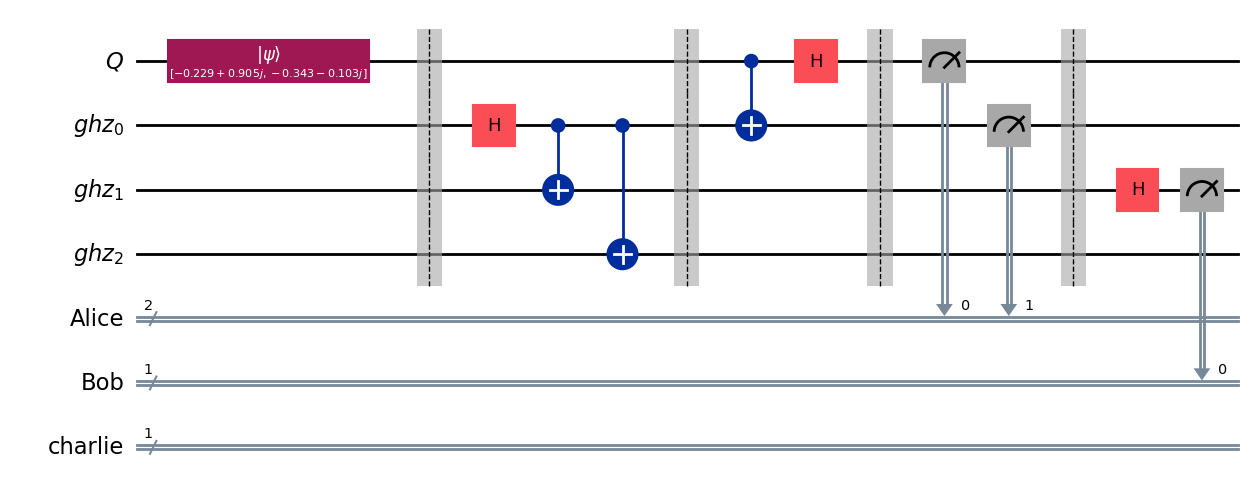

In [8]:
tele_qc.barrier()
tele_qc.h(ghz[1])
tele_qc.measure(ghz[1], bob)
tele_qc.draw('mpl')

# 9: Charlie's Corrections Based on Alice and Bob's Bits

In this step, Charlie applies corrections to the qubit `ghz[2]` based on the measurement results from Alice and Bob. These corrections ensure that the entangled state is properly restored. Depending on Alice's and Bob's measurement outcomes, Charlie applies either Pauli-X or Pauli-Z gates.

The conditional logic can be expressed as follows:

- If Alice measures `00` and Bob measures `1`, apply a Pauli-Z gate: $$ Z|\psi\rangle $$
- If Alice measures `01` and Bob measures `0`, apply a Pauli-Z gate: $$ Z|\psi\rangle $$
- If Alice measures `10` and Bob measures `0`, apply a Pauli-X gate: $$ X|\psi\rangle $$
- If Alice measures `10` and Bob measures `1`, apply both a Pauli-X and Pauli-Z gate: $$ XZ|\psi\rangle $$
- If Alice measures `11` and Bob measures `0`, apply both a Pauli-X and Pauli-Z gate: $$ XZ|\psi\rangle $$
- If Alice measures `11` and Bob measures `1`, apply a Pauli-X gate: $$ X|\psi\rangle $$

This ensures that Charlie can transform the state back to the correct form, based on the classical communication from Alice and Bob.

------

In [9]:
qc_copy = tele_qc.copy()

qc_copy.barrier()

# Apply corrections based on Alice and Bob measurement results

with qc_copy.if_test((alice, 0)):  # Alice measured 00
    with qc_copy.if_test((bob, 1)):  # Bob measured 1
        qc_copy.z(ghz[2])

with qc_copy.if_test((alice, 1)):  # Alice measured 01
    with qc_copy.if_test((bob, 0)):  # Bob measured 0
        qc_copy.z(ghz[2])

with qc_copy.if_test((alice, 2)):  # Alice measured 10
    with qc_copy.if_test((bob, 0)):  # Bob measured 0
        qc_copy.x(ghz[2])
    with qc_copy.if_test((bob, 1)):  # Bob measured 1
        qc_copy.x(ghz[2])
        qc_copy.z(ghz[2])

with qc_copy.if_test((alice, 3)):  # Alice measured 11
    with qc_copy.if_test((bob, 0)):  # Bob measured 0
        qc_copy.x(ghz[2])
        qc_copy.z(ghz[2])
    with qc_copy.if_test((bob, 1)):  # Bob measured 1
        qc_copy.x(ghz[2])

# 10: Draw the Final Circuit

In this step, we visualize the final quantum circuit after all operations and measurements. The `fold=40` argument ensures that the diagram is wrapped neatly if the circuit becomes too wide. This provides a clear and readable representation of the entire quantum teleportation process.


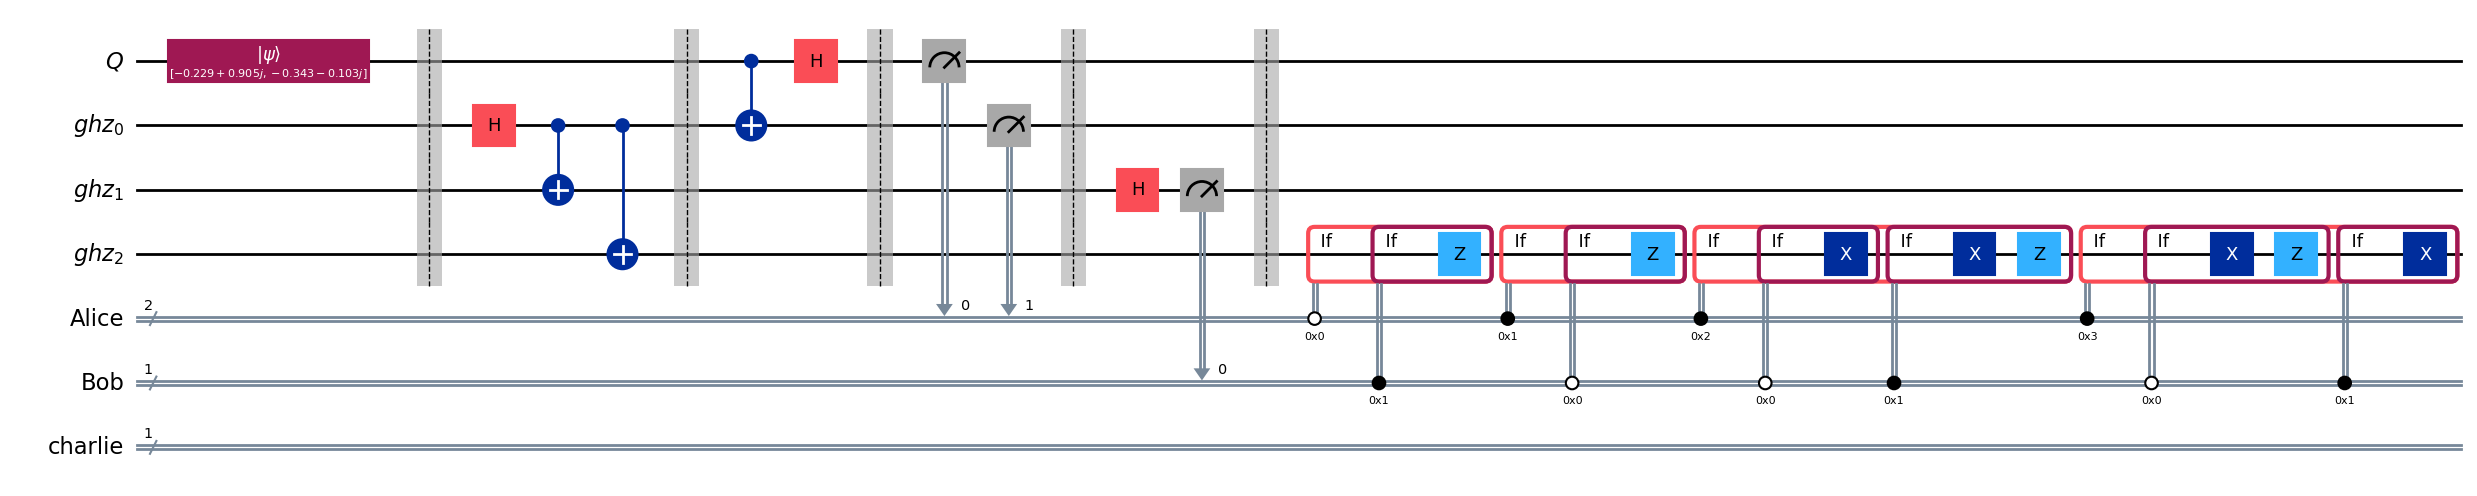

In [10]:
qc_copy.draw('mpl', fold=40)

# 11: Run the Circuit and Display Quasi-Probabilities

In this step, we run the quantum circuit for both the original and the teleported version using the `Sampler` from `qiskit_aer.primitives`. This allows us to measure the quasi-probabilities of the final states for both circuits.

After measuring all qubits, we use the `Sampler` to execute the circuits and obtain the quasi-probabilities. The quasi-probabilities represent the likelihood of each possible measurement outcome for the quantum states.

Note: The teleported state should ideally have the same distribution as the original state, assuming the teleportation protocol works as expected.


In [11]:
from qiskit_aer.primitives import Sampler

qc.measure_all()

qc_copy = qc.copy()

# Initialize Sampler
sampler = Sampler()

# Run the circuit
job_static = sampler.run(qc)        # original
job_dynamic = sampler.run(qc_copy)  # teleported

# Print the quasi-probabilities
print(f"Original Dists: {job_static.result().quasi_dists[0].binary_probabilities()}")
print(f"Teleported Dists: {job_dynamic.result().quasi_dists[0].binary_probabilities()}")

Original Dists: {'1': 0.1337890625, '0': 0.8662109375}
Teleported Dists: {'1': 0.1259765625, '0': 0.8740234375}


# 12: Marginalize Over the 3rd Qubit and Display Teleported Counts

In this step, we marginalize over the third qubit (index 2) of the teleported system to obtain the distribution of the remaining qubits. Marginalization is the process of summing over the possible outcomes of a qubit to focus on the states of the other qubits.

This allows us to see the final distribution of the two qubits after teleportation, which should help us verify the correctness of the teleportation process. The result is stored in `tele_counts`, which represents the marginalized measurement outcomes.



In [12]:
from qiskit.result import marginal_counts

# Access the quasi-probabilities
quasi_probs = job_dynamic.result().quasi_dists[0].binary_probabilities()

tele_counts = marginal_counts(quasi_probs)

print(tele_counts)

{'1': 0.1259765625, '0': 0.8740234375}


# Result: Plot the Comparison of Original and Teleported States

In this final step, we plot a histogram to visually compare the measurement distributions of the original and teleported states. The `plot_histogram` function from Qiskit is used to generate this comparison. By plotting both the original state's quasi-probabilities and the teleported state's marginalized counts, we can verify that the teleportation process preserves the quantum information.

The `legend` is used to differentiate the two distributions in the plot, labeling them as 'Original State' and 'Teleported State'.


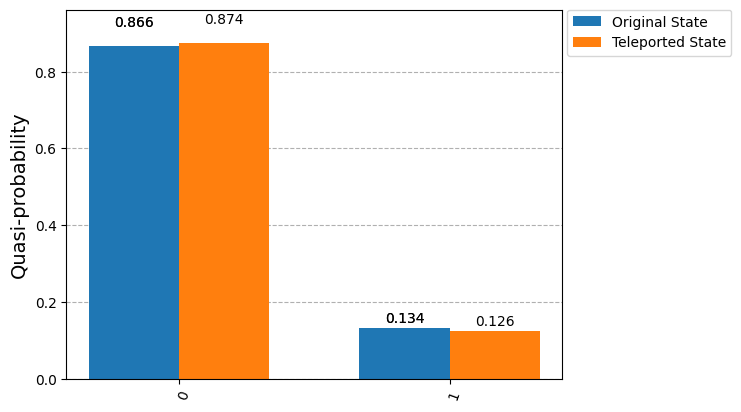

In [13]:
legend = ['Original State', 'Teleported State']
plot_histogram([job_static.result().quasi_dists[0].binary_probabilities(), tele_counts], legend=legend)